# Cubical Ripser 2D : Calculation of Persitent Homology of 2D Cubical Toplexes 

Here we explore one of the various PH algorithms that are integrated into the TDA toolkit.  These include;

- Cubical RIPSER; https://github.com/CubicalRipser



In [3]:
#  Import the Cube2D module
import Cube2D

#  Here are the available classes and methods in TDA:
dir(Cube2D)

['Axes3D',
 'CubicalRipser2D',
 'Filter2D',
 'PCA',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'compute_2DPHD',
 'compute_2DPHD_from_file',
 'convert_binary_cells_to_point_cloud',
 'convert_csv_to_dipha',
 'csv',
 'display',
 'gridspec',
 'interp',
 'np',
 'pd',
 'plot_barcode_diagram',
 'plot_barcode_diagram_from_file',
 'plot_persistence_diagram',
 'plot_persistence_diagram_from_file',
 'plt',
 'save_array_to_dipha',
 'save_binary_cells_to_point_cloud',
 'struct',
 'warnings',
 'widgets']

There are currently 4 Persistent Homology classes in the standard TDA Toolkit; CubicalRipser2D, CubicalRipser3D, Perseus and Ripser.  Each of them have a default constructor, destructor and a ComputeBarcode() method:

In [2]:
dir(Cube2D.CubicalRipser2D)

['ComputeBarcode',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'getBarcode']

# Cubical Ripser 2D

Let's examine each of these PH functions.  First, CubicalRipser2D takes the following function arguments;

**CubicalRipser2D::ComputeBarcode(string input_file, string output_file, string format, string method, double threshold, bool print)**

Where the input file is either DIPHA or PERSEUS formatted file with the 2D persistence image condensed into a single vector.  The method can either be the Linkfind method () or the Compute Pairs method ().  The Print option will print the results to the screen.


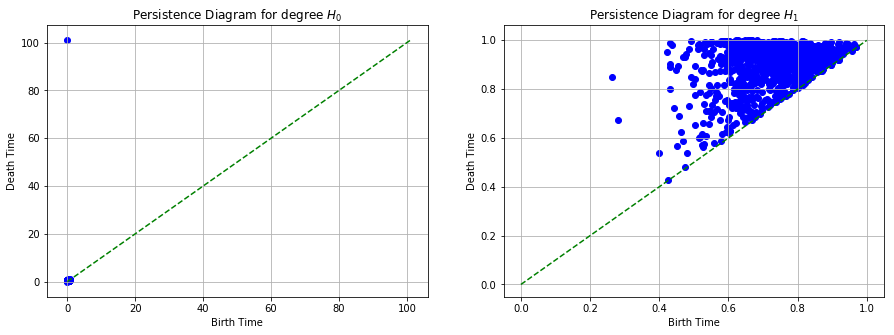

In [4]:
from Cube2D import CubicalRipser2D
#  Create a CubicalRipser2D object
cube2D = CubicalRipser2D()

#  Try one of the examples in the dat/ folder
cube2D.ComputeBarcode("algorithms/CubicalRipser_2dim/dat/test_2_100.complex", "test.csv", "DIPHA", "COMPUTEPAIRS", 100, True)
barcode = cube2D.getBarcode()
Cube2D.plot_persistence_diagram(barcode)

We can also plot a barcode diagram

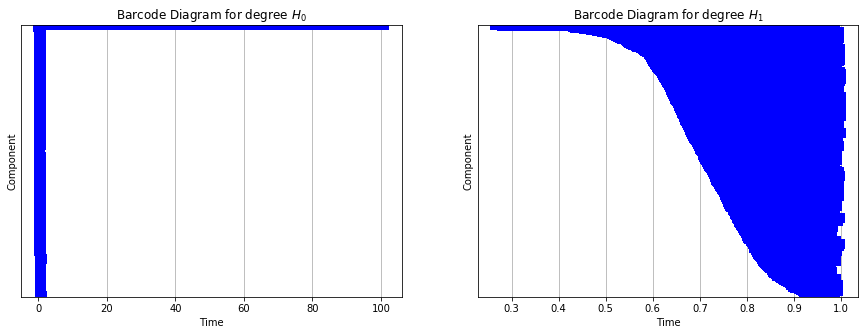

In [9]:
Cube2D.plot_barcode_diagram(barcode)

To compute the Persistent Homology Dimension, we simply call

[-6.90103466  1.92973791]


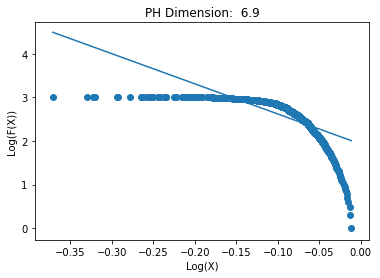

In [10]:
Cube2D.compute_2DPHD(barcode)

Let's try to see if CubicalRipser2D can find the Homology of a circle S^1

Saved array to DIPHA format file examples/grid_test.csv



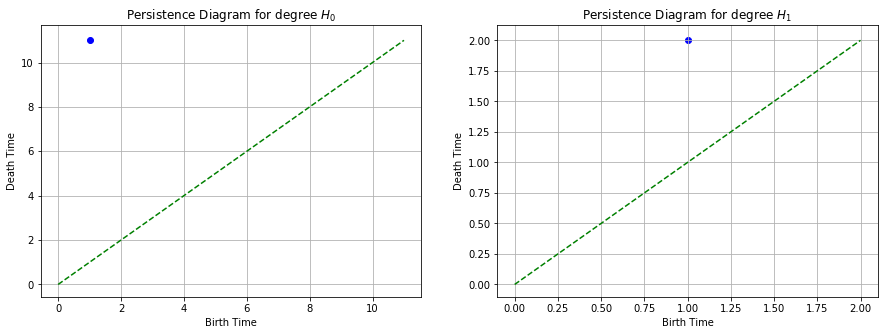

In [9]:
# Create 3x3 2D pixel array
grid = [[1,1,1],[1,2,1],[1,1,1]]

# save as dipha format
Cube2D.save_array_to_dipha(grid, "examples/grid_test.csv")

#  Compute the barcode
cube2D.ComputeBarcode("examples/grid_test.csv", "examples/test.csv", "DIPHA", "COMPUTEPAIRS", 10, True)

#  Plot the persistence diagram
Cube2D.plot_persistence_diagram_from_file("examples/test.csv")

Or together

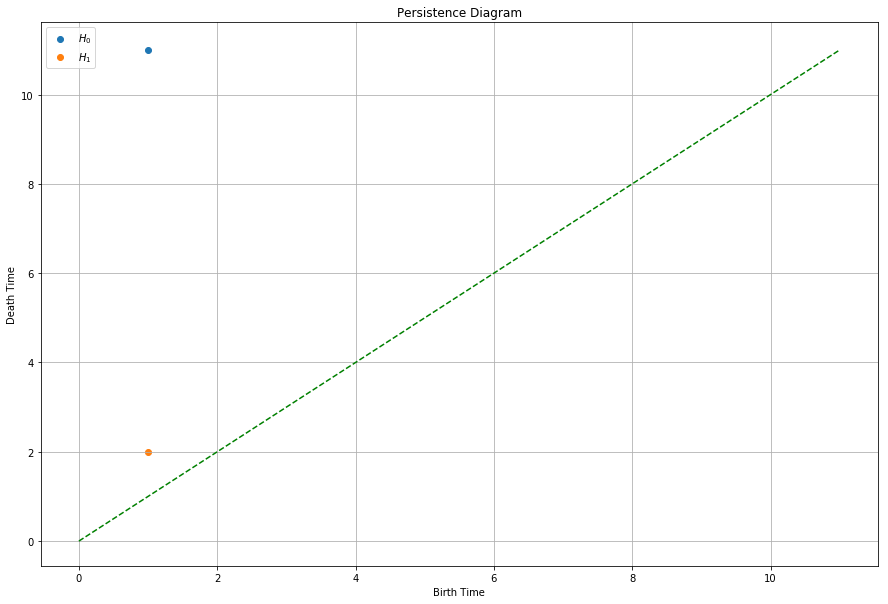

In [15]:
Cube2D.plot_persistence_diagram_from_file("test.csv", split=False)

And the corresponding barcode

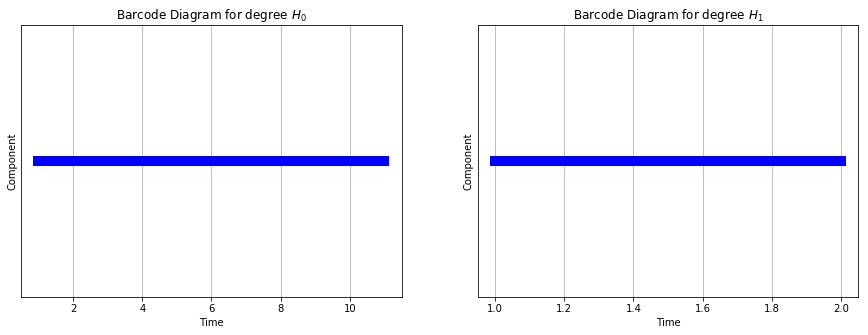

In [16]:
Cube2D.plot_barcode_diagram_from_file("test.csv")

And of course the Persistent Homology Dimension

[-0.  0.]


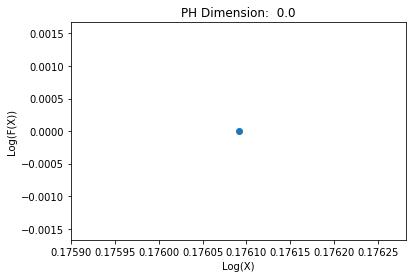

In [18]:
Cube2D.compute_2DPHD_from_file("test.csv")

# Filters

There are various filter functions available for binary cell data.  The von Neumann filter simulates the "growing balls" filter that one normally uses on point cloud data by looking at the up,down,left and right cells in the image and updating them according to the current time step.  To see how this works, consider the following example;

Converted examples/square_VF.csv to DIPHA format file examples/square_dipha.csv



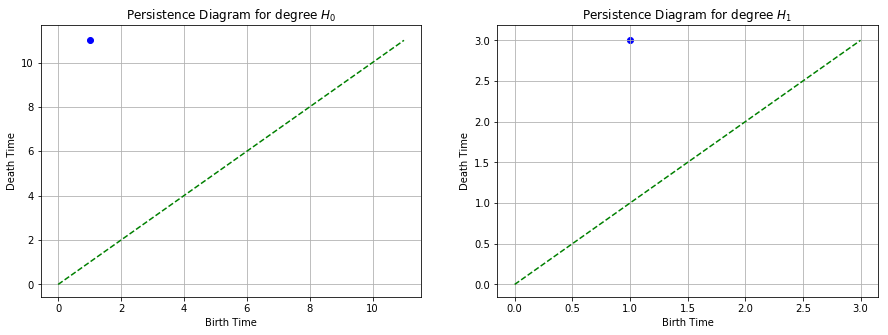

In [7]:
import csv
from Cube2D import Filter2D
#    create a 5x5 grid with the homology of S^1
grid = [[1,1,1,1,1],[1,0,0,0,1],[1,0,0,0,1],[1,0,0,0,1],[1,1,1,1,1]]

#    write this data to file
with open("examples/square.csv", 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerows(grid)
    
#   try 2D von neumann filter
filt = Filter2D()
filt.loadBinaryFromFile("examples/square.csv")
filt.filterBinaryVonNeumann(10)
filt.saveBinaryFiltration("examples/square_VF.csv")

#    create CubicalRipser2D object
cube2D = CubicalRipser2D()

#    convert the filtration to DIPHA format
Cube2D.convert_csv_to_dipha("examples/square_VF.csv", "examples/square_dipha.csv")

#    compute the barcode and plot the persistence diagram
cube2D.ComputeBarcode("examples/square_dipha.csv", "test.csv", "DIPHA", "COMPUTEPAIRS", 10, True)
barcode = cube2D.getBarcode()
Cube2D.plot_persistence_diagram(barcode)

Another type of filter is the Moore filter which looks at not just the up,down,left and right neighbors, but also the diagonal.  This is more of a "taxi-cab growing balls" filter, rather than the L2 filter in the previous example.  To see how this works, consider;

Converted examples/square_MF.csv to DIPHA format file examples/square_dipha.csv



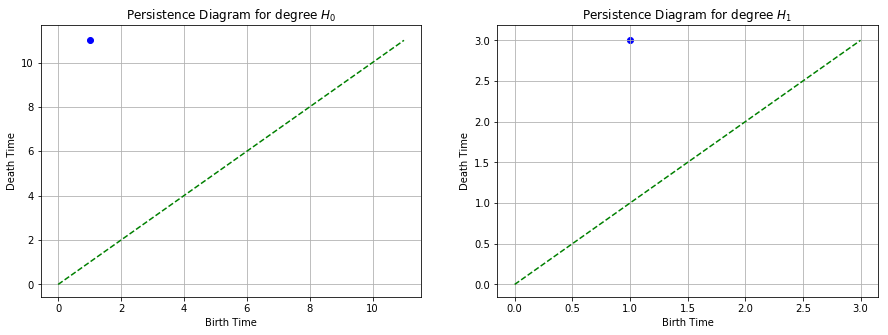

In [8]:
#   try 2D Moore filter
filt = Filter2D()
filt.loadBinaryFromFile("examples/square.csv")
filt.filterBinaryMoore(10)
filt.saveBinaryFiltration("examples/square_MF.csv")

#    create CubicalRipser2D object
cube2D = CubicalRipser2D()

#    convert the filtration to DIPHA format
Cube2D.convert_csv_to_dipha("examples/square_MF.csv", "examples/square_dipha.csv")

#    compute the barcode and plot the persistence diagram
cube2D.ComputeBarcode("examples/square_dipha.csv", "test.csv", "DIPHA", "COMPUTEPAIRS", 10, True)
barcode = cube2D.getBarcode()
Cube2D.plot_persistence_diagram(barcode)

In this example of course it does not make much of a difference, but it will in general shift the PH points down.